In [1]:
from __future__ import print_function, division
import numpy as np
import astropy.units as u

In [2]:
import matplotlib.pyplot as plt

# Turn on quantity support for plotting. This is very helpful!
from astropy.visualization import quantity_support

quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fe15977af50>

In [3]:
import pint.toa as toa

a = toa.TOA(
    (54567, 0.876876876876876),
    4.5 * u.us,
    freq=1400.0 * u.MHz,
    obs="GBT",
    backend="GUPPI",
)
print(a)

54567.8768768768768759:  4.500 us error from 'gbt' at 1400.0000 MHz {'backend': 'GUPPI'}


In [41]:
# An example of reading a TOA file
import pint.toa as toa
import pint.models as models
import pint.residuals as r
import pint.fitter as fit

In [12]:
t = toa.get_TOAs("./datafiles/NGC6440E.tim")

INFO: No pulse numbers found in the TOAs [pint.toa]
INFO: Applying clock corrections (include_GPS = True, include_BIPM = True. [pint.toa]
INFO: Evaluating observatory clock corrections. [pint.observatory.topo_obs]
INFO: Applying GPS to UTC clock correction (~few nanoseconds) [pint.observatory.topo_obs]
INFO: Applying TT(TAI) to TT(BIPM) clock correction (~27 us) [pint.observatory.topo_obs]
INFO: Computing TDB columns. [pint.toa]
INFO: Doing astropy mode TDB conversion [pint.observatory]
INFO: Computing positions and velocities of observatories and Earth (planets = False), using DE421 ephemeris [pint.toa]


In [14]:
#  Here is a summary.
t.print_summary()

Number of TOAs:  62
Number of commands:  1
Number of observatories:  1 ['gbt']
MJD span:  53478.286 to 54187.587
gbt TOAs (62):
  Min error:     13.2 us
  Max error:     118 us
  Mean error:    26.9 us
  Median error:  22.1 us
  Error stddev:  15.6 us



In [15]:
# The get_mjds() method returns an array of the MJDs for the TOAs
# Here is the MJD of the first TOA. Notice that is has the units of days
print(t.get_mjds()[0])

53478.28587141922 d


## TOAs are stored in a Astropy Table in an instance of the TOAs class.

In [16]:
# List the table columns, which include pre-computed TDB times and
# solar system positions and velocities
t.table.colnames

['index',
 'mjd',
 'mjd_float',
 'error',
 'freq',
 'obs',
 'flags',
 'delta_pulse_number',
 'groups',
 'tdb',
 'tdbld',
 'ssb_obs_pos',
 'ssb_obs_vel',
 'obs_sun_pos']

##### Lots of cool things that tables can do…

In [19]:
# This pops open a browser window showing the contents of the table
tt = t.table
# tt.show_in_browser()

##### Can do fancy sorting, selecting, re-arranging very easily.

In [20]:
select = t.get_errors() < 20 * u.us
print(select)

[False False False False False False False  True False False False False
 False False  True False  True False False False  True False  True False
  True  True  True  True False  True False  True  True  True False False
 False False False False False False  True  True False  True  True False
 False False  True False False False False False False False False False
 False False]


In [21]:
tt["tdb"][select]

53679.87638798794
53690.85126495607
53695.85965074819
53709.81035518692
53740.775353131845
53801.59218746964
53833.2985647664
53833.50321218054
53843.33283383857
53865.37670583518
53895.32422385059


##### TOAs objects have a select() method to select based on a boolean mask. This selection can be undone later with unselect.

In [22]:
t.print_summary()
t.select(select)
t.print_summary()
t.unselect()
t.print_summary()

Number of TOAs:  62
Number of commands:  1
Number of observatories:  1 ['gbt']
MJD span:  53478.286 to 54187.587
gbt TOAs (62):
  Min error:     13.2 us
  Max error:     118 us
  Mean error:    26.9 us
  Median error:  22.1 us
  Error stddev:  15.6 us

Number of TOAs:  18
Number of commands:  1
Number of observatories:  1 ['gbt']
MJD span:  53679.876 to 54153.549
gbt TOAs (18):
  Min error:     13.2 us
  Max error:     19.6 us
  Mean error:    16.5 us
  Median error:  16.4 us
  Error stddev:  2.21 us

Number of TOAs:  62
Number of commands:  1
Number of observatories:  1 ['gbt']
MJD span:  53478.286 to 54187.587
gbt TOAs (62):
  Min error:     13.2 us
  Max error:     118 us
  Mean error:    26.9 us
  Median error:  22.1 us
  Error stddev:  15.6 us



##### Many PINT routines / classes / functions use Astropy Units internally or externally:

In [23]:
t.get_errors()

<Quantity [ 21.71,  21.95,  29.95,  25.46,  23.43,  31.67,  30.26,  13.52,
            21.64,  27.41,  24.58,  23.52,  21.71,  21.47,  17.72,  28.88,
            14.63,  38.03,  31.47,  33.26,  13.88,  26.89,  18.29,  21.48,
            17.88,  18.59,  19.03,  15.07,  21.58,  14.72,  25.14,  14.65,
            19.29,  13.25,  20.71,  23.57,  23.45,  22.16,  23.53,  21.01,
            21.66,  75.3 ,  19.65,  16.28,  21.93,  14.  ,  19.35,  32.92,
            33.83, 118.43,  16.45,  30.18,  21.8 ,  20.75,  32.75,  31.29,
            37.13,  37.4 ,  35.24,  50.83,  38.43,  48.59] us>

##### The times in each row contain (or are derived from) Astropy Time objects:

In [24]:
t0 = tt["mjd"][0]

In [25]:
t0.tai

<Time object: scale='tai' format='pulsar_mjd' value=53478.28624178991>

##### But the most useful timescale, TDB is also stored in its own column as a long double numpy array, to maintain precision and keep from having to redo the conversion. Note that is is the TOA time converted to the TDB timescale, but the Solar System delays have not been applied, so this is NOT what people call “barycentered times”

In [26]:
tt["tdbld"][:3]

53478.286614308378386
53483.27744807716902
53489.469132675783513


#### Timing (or other) Models
Now let’s define and load a timing model

In [29]:
m = models.get_model("./datafiles/NGC6440E.par")

In [31]:
print(m.as_parfile())

PSR                            1748-2021E
EPHEM                               DE421
RAJ                     17:48:52.75000000 1 0.00000000000000000000
DECJ                   -20:21:29.00000000 1 0.00000000000000000000
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH           53750.0000000000000000
F0                           61.485476554 1 0.0
F1                             -1.181e-15 1 0.0
PEPOCH             53750.0000000000000000
PLANET_SHAPIRO                          N
DM                                  223.9 1 0.0
DM1                                   0.0
NE_SW                                 0.0
SWM                                   0.0
TZRMJD             53801.3860511822300000
TZRSITE                                 1
TZRFRQ                           1949.609



##### Timing models are basically composed of “delay” terms and “phase” terms. The delay terms are evaluated in order, going from terms local to the Solar System, which are needed for computing ‘barycenter-corrected’ TOAs, through terms for the binary system.

In [32]:
m.delay_funcs

[<bound method Astrometry.solar_system_geometric_delay of AstrometryEquatorial(
     MJDParameter(   POSEPOCH        53750.0000000000000000 (d) frozen=True),
     floatParameter( PX              0.0               (mas) frozen=True),
     AngleParameter( RAJ             17:48:52.75000000 (hourangle) +/- 0h00m00s frozen=False),
     AngleParameter( DECJ            -20:21:29.00000000 (deg) +/- 0d00m00s frozen=False),
     floatParameter( PMRA            0.0               (mas / yr) frozen=True),
     floatParameter( PMDEC           0.0               (mas / yr) frozen=True))>,
 <bound method SolarSystemShapiro.solar_system_shapiro_delay of SolarSystemShapiro(
     boolParameter(  PLANET_SHAPIRO  N                 frozen=True))>,
 <bound method DispersionDM.constant_dispersion_delay of DispersionDM(
     floatParameter( DM              223.9             (pc / cm3) +/- 0.0 pc / cm3 frozen=False),
     floatParameter( DM1             0.0               (pc / (cm3 yr)) frozen=True),
     MJDPar

##### The phase functions include the spindown model and an absolute phase definition (if the TZR parameters are specified).

In [33]:
m.phase_funcs

[<bound method Spindown.spindown_phase of Spindown(
     floatParameter( F0              61.485476554      (Hz) +/- 0.0 Hz frozen=False),
     floatParameter( F1              -1.181e-15        (Hz / s) +/- 0.0 Hz / s frozen=False),
     MJDParameter(   PEPOCH          53750.0000000000000000 (d) frozen=True))>]

##### You can easily show/compute individual terms…

In [34]:
ds = m.solar_system_shapiro_delay(t)
print(ds)

[-4.11774615e-06 -4.58215733e-06 -5.09435414e-06  1.26025166e-05
  1.26025164e-05  1.26025162e-05  1.26025160e-05  1.26025163e-05
  1.34033282e-05  1.35163226e-05  1.43416919e-05  1.53159181e-05
  1.63198995e-05  1.64587639e-05  1.80783671e-05  2.11530227e-05
  2.12647452e-05  2.49851393e-05  2.51080759e-05  3.45107578e-05
  3.47450145e-05  3.00319035e-05  2.98083009e-05  2.11804876e-06
  2.07541049e-06 -3.00762925e-06 -3.03173087e-06 -4.09655364e-06
 -5.80849733e-06 -5.81983363e-06 -6.90339229e-06 -6.90646307e-06
 -6.82672804e-06 -6.82292820e-06 -5.19141699e-06 -5.17650522e-06
 -2.63564143e-06 -2.60880558e-06  2.28385789e-06  2.32788086e-06
  1.51692739e-05  1.52882687e-05  5.13321681e-05  4.61456319e-05
  3.99876478e-05  3.82020218e-05  6.59654821e-06  6.09155453e-06
  5.78124973e-06  5.45386907e-06  5.22873336e-06  3.47897242e-06
 -1.52400083e-06 -1.56079046e-06  3.82020202e-05  3.82020207e-05
  3.82020212e-05  3.82020216e-05  3.82020219e-05  3.82020222e-05
  3.82020225e-05  3.82020

##### The get_mjds() method can return the TOA times as either astropy Time objects (for high precision), or as double precisions Quantities (for easy plotting)

Text(0, 0.5, 'Delay ($\\mu$s)')

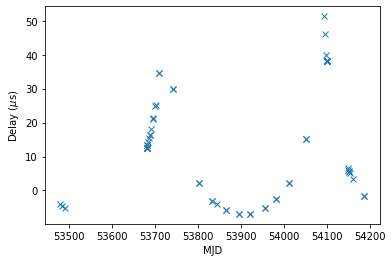

In [35]:
plt.plot(t.get_mjds(high_precision=False), ds * 1e6, "x")
plt.xlabel("MJD")
plt.ylabel("Delay ($\mu$s)")

##### or all of the terms added together:

In [36]:
m.delay(t)

<Quantity [-256.27780385, -292.17727414, -333.75096918,  357.15222974,
            357.10424491,  357.06652485,  357.03633769,  357.08429712,
            367.69388946,  369.13838938,  379.080215  ,  389.80455011,
            399.7984286 ,  401.11641315,  415.02787367,  435.89826732,
            436.54658382,  454.24106089,  454.72545487,  478.04207904,
            478.38385956,  468.46407861,  467.91561351,   94.36851725,
             92.62907224, -175.81784133, -177.46527042, -253.52910299,
           -394.21626285, -395.23691322, -497.24000468, -497.54026381,
           -488.57105536, -488.1777565 , -337.19429477, -335.91546229,
           -146.57383909, -144.8059907 ,  105.78805673,  107.5422893 ,
            389.24590076,  390.51827027,  490.40921287,  488.47335247,
            484.41365305,  482.68741688,  240.08987512,  226.85717062,
            218.50192024,  209.24145601,  202.56740375,  146.32214659,
            -81.97888773,  -84.14610449,  482.769396  ,  482.74220183,
      

In [37]:
m.phase(t)

Phase(int=<Quantity [-1.44341954e+09, -1.41690430e+09, -1.38400938e+09,
           -3.72542787e+08, -3.72542787e+08, -3.72542787e+08,
           -3.72542787e+08, -3.72542787e+08, -3.62847847e+08,
           -3.61499695e+08, -3.52032417e+08, -3.41404820e+08,
           -3.31051996e+08, -3.29649995e+08, -3.14244015e+08,
           -2.88506714e+08, -2.87639064e+08, -2.61817243e+08,
           -2.61038143e+08, -2.14444888e+08, -2.13530679e+08,
           -5.01336260e+07, -4.90332780e+07,  2.72978647e+08,
            2.74069813e+08,  4.42521539e+08,  4.43608798e+08,
            4.95831818e+08,  6.11929492e+08,  6.12945188e+08,
            7.70924046e+08,  7.72043031e+08,  9.03412910e+08,
            9.04406151e+08,  1.08890761e+09,  1.08998276e+09,
            1.22664968e+09,  1.22780114e+09,  1.38557098e+09,
            1.38668825e+09,  1.59742747e+09,  1.59871034e+09,
            1.82559636e+09,  1.83620365e+09,  1.85220237e+09,
            1.85775342e+09,  2.11794965e+09,  2.12718658e+09

#### Residuals

In [39]:
rs = r.Residuals(t, m)

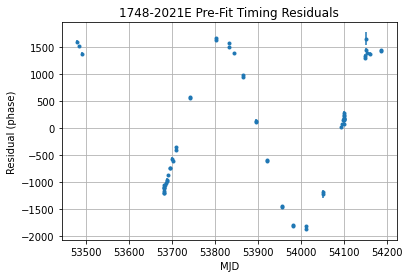

In [40]:
# Note that the Residuals object contains a toas member that has the TOAs used to compute
# the residuals, so you can use that to get the MJDs and uncertainties for each TOA
# Also note that plotting astropy Quantities must be enabled using
# astropy quanity_support() first (see beginning of this notebook)
plt.errorbar(
    rs.toas.get_mjds(),
    rs.time_resids.to(u.us),
    yerr=rs.toas.get_errors().to(u.us),
    fmt=".",
)
plt.title("%s Pre-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (phase)")
plt.grid()

#### Fitting and Post-Fit residuals

##### The fitter is completely separate from the model and the TOA code. So you can use any type of fitter with some easy coding to create a new subclass of Fitter. This example uses PINT’s Weighted Least Squares fitter. The return value for this fitter is the chi^2 after the fit.

In [42]:
f = fit.WLSFitter(t, m)
f.fit_toas()

<Quantity 59.57433584>

In [43]:
print(
    "Best fit has reduced chi^2 of {:.3f} ({} dof)".format(
        f.resids.chi2_reduced, f.resids.dof
    )
)
# Notice that the residuals have units, since they are astropy Quantities
print("RMS in phase is", f.resids.phase_resids.std())
print("RMS in time is", f.resids.time_resids.std().to(u.us))
print("\n Best model is:")
print(f.model.as_parfile())

Best fit has reduced chi^2 of 1.045 (57 dof)
RMS in phase is 0.0020495750577082883 cycle
RMS in time is 33.33429571609191 us

 Best model is:
PSR                            1748-2021E
EPHEM                               DE421
RAJ                     17:48:52.80034692 1 0.00000003756850254201
DECJ                   -20:21:29.38330644 1 0.00000912542586891742
PMRA                                  0.0
PMDEC                                 0.0
PX                                    0.0
POSEPOCH           53750.0000000000000000
F0                  61.485476554372500174 1 1.808608439278160892e-11
F1              -1.1813316404489501177e-15 1 1.4418540386148105756e-18
PEPOCH             53750.0000000000000000
PLANET_SHAPIRO                          N
DM                  224.11379728458493038 1 0.034938980494131084698
DM1                                   0.0
NE_SW                                 0.0
SWM                                   0.0
TZRMJD             53801.3860511822300000
TZRSITE     

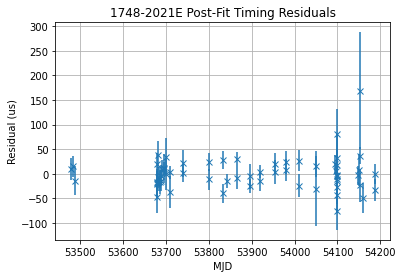

In [44]:
plt.errorbar(
    t.get_mjds(), f.resids.time_resids.to(u.us), t.get_errors().to(u.us), fmt="x"
)
plt.title("%s Post-Fit Timing Residuals" % m.PSR.value)
plt.xlabel("MJD")
plt.ylabel("Residual (us)")
plt.grid()

#### Other interesting things

##### We can make Barycentered TOAs in a single line, if you have a model and a TOAs object! These are TDB times with the Solar System delays applied (precisely which of the delay components are applied is changeable – the default applies all delays before the ones associated with the binary system)

In [45]:
m.get_barycentric_toas(t)

<Quantity [53478.28958049, 53483.28082976, 53489.47299553, 53679.87225507,
           53679.87225507, 53679.87225507, 53679.87225507, 53679.87225507,
           53681.69723814, 53681.95101532, 53683.73314312, 53685.73369027,
           53687.68251394, 53687.9464277 , 53690.84646139, 53695.69127101,
           53695.85459813, 53700.71531786, 53700.86197625, 53709.63272692,
           53709.80481834, 53740.56280708, 53740.76993744, 53801.38571343,
           53801.59111537, 53833.3005997 , 53833.50526618, 53843.3357682 ,
           53865.19008493, 53865.38128034, 53895.11934381, 53895.32998242,
           53920.05915093, 53920.24611939, 53954.97681797, 53955.1792041 ,
           53980.90549269, 53981.12224385, 54010.82096314, 54011.0312776 ,
           54050.70099242, 54050.94248163, 54093.65168364, 54095.64840818,
           54098.6600184 , 54099.70495257, 54148.68449507, 54150.42326217,
           54151.5250477 , 54152.71578   , 54153.54699406, 54160.5219243 ,
           54187.33328679